In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyomo.environ import *
from pyomo.dae import *

ModuleNotFoundError: No module named 'pyomo'

In [23]:
tfinal = 10
tau = 1
K = 0.15

# create a model object
model = ConcreteModel()

# define the independent variable
model.t = ContinuousSet(bounds=(0, tfinal))

# define the dependent variables
model.y = Var(model.t)
model.dydt = DerivativeVar(model.y)

# fix the initial value of y
model.y[0].fix(4)

# define the differential equation as a constraint
@model.Constraint(model.t)
def ode(m, t):
    return model.dydt[t] == K * model.y[t]


In [24]:
model.y.display()

y : Size=2, Index=t
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :  None :     4 :  None :  True : False :  Reals
     10 :  None :  None :  None : False :  True :  Reals


In [25]:
tsim, profiles = Simulator(model, package='scipy').simulate(numpoints=101)

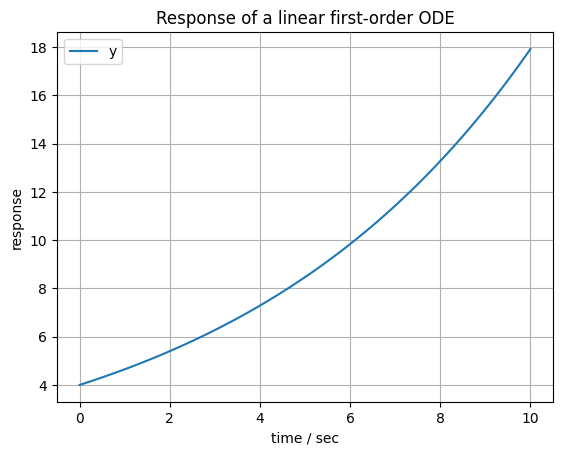

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(tsim, profiles, label='y')
ax.set_xlabel('time / sec')
ax.set_ylabel('response')
ax.set_title('Response of a linear first-order ODE')
ax.legend()
ax.grid(True)

## Household

Households do not optimize when it comes to their savings or consumption decisions. Instead, their behavior is captured by

$S(t)=sE(t)$

$C(t)= E(t) - S(t)$ 

where: $E(t)$ is earnings, $S(t)$ is savings and $C(t)$ is consumption, at time $t$ for all.

Let us also introduce population growth into this model and assume that the labor force
L(t) grows proportionally at rate $n$, that is,

$L(t) = e^{nt}L(0)$

## Firm

The production function for the firm is 

$Y(t) = F(K(t), L(t), A(t))$

$= AK(t)^αL(t)^{1−α}, 0 < α < 1$

The law of motion of the capital is  
$\dot{K} = I(t) - \delta K(t)$

## Interface between Household and Firm

The following 2 relationship

$L = P$
$I = S$

imply that there is no unemployment, the total population work, and all savings are invested, there is no money herding??

## Pyomo Model

In [73]:
tfinal = 100

# PARAMETERS
n = 0.0                                          # population growth
s = 0.15
delta = 0.05
alpha = 0.3
A =  2

# create a economy object
economy = ConcreteModel()

# define the independent variable
economy.t = ContinuousSet(bounds=(0, tfinal))

# POPULATION
P_init = 100                                  # initial population
economy.P = Var(economy.t)
economy.dPdt = DerivativeVar(economy.P)
economy.P[0].fix(P_init)

@economy.Constraint(economy.t)
def pop(m, t):
    return economy.dPdt[t] == n * economy.P[t]

# CAPTIAL
K_init = 500                                    # initial population
economy.K = Var(economy.t)
economy.dKdt = DerivativeVar(economy.K)
economy.K[0].fix(K_init)

@economy.Constraint(economy.t)
def capital(m, t):
    return economy.dKdt[t] == s * (A * economy.K[t]**alpha * economy.P[t]**(1 - alpha)) - delta * economy.K[t]

In [74]:
tsim, profiles = Simulator(economy, package='scipy').simulate(numpoints=101)

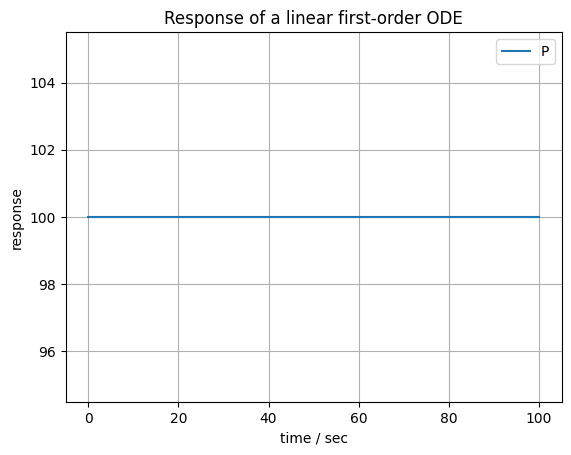

In [75]:
fig, ax = plt.subplots(1, 1)
ax.plot(tsim, profiles[:, 0], label='P')
ax.set_xlabel('time / sec')
ax.set_ylabel('response')
ax.set_title('Response of a linear first-order ODE')
ax.legend()
ax.grid(True)

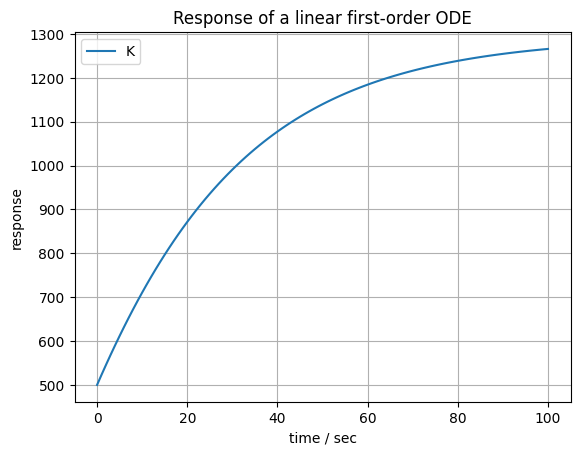

In [83]:
fig, ax = plt.subplots(1, 1)
ax.plot(tsim, profiles[:, 1], label='K')
ax.set_xlabel('time / sec')
ax.set_ylabel('response')
ax.set_title('Response of a linear first-order ODE')
ax.legend()
ax.grid(True)